# Instantaneous Circle of Rotation


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

### How to Use This for Control

#### Calculate ICR:

For a given desired motion, compute the ICR position \($(ICR_x, ICR_y)$\). This depends on the desired turn radius and direction.

#### Steering Angles:

Calculate the steering angles for each wheel. For each wheel, the angle \(\theta\) is given by:
$$
\theta = \tan^{-1}\left(\frac{ICR_y - y_{\text{wheel}}}{ICR_x - x_{\text{wheel}}}\right)
$$

#### Wheel Speeds:

Calculate the speed for each wheel based on its radius from the ICR. The speed \( V \) for each wheel is proportional to its distance from the ICR:
$$
V = \omega \cdot \sqrt{(ICR_x - x_{\text{wheel}})^2 + (ICR_y - y_{\text{wheel}})^2}
$$
Where \( $\omega$ \) is the angular velocity of the robot around the ICR.
### The Functions


In [2]:
def steering_angle(ICR_x,ICR_y,point_x,point_y):
    # Calculate the steering angle
    angle = np.arctan2(point_y-ICR_y,point_x-ICR_x)
    return angle

def wheel_speed(ICR_x,ICR_y,point_x,point_y, target_speed=1):
    # Calculate the wheel speed
    # Essensially the speed is just proportional to the distance to ICR from wheel
    speed = np.sqrt((point_x-ICR_x)**2 + (point_y-ICR_y)**2)
    print("relative speed",speed)
    speed = speed / np.mean(speed)
    print("out speed",speed)
    print("sum",np.sum(speed))
    return speed*target_speed

def calculate_icr_from_wheels(x_1, y_1, theta_1, x_2, y_2, theta_2):
    # Calculate the ICR x and y coordinates
   
    tan_theta_i = np.tan(theta_1)
    tan_theta_j = np.tan(theta_2)

    ICR_x = (x_1 * tan_theta_i - x_2 * tan_theta_j) / (tan_theta_i - tan_theta_j)
    ICR_y = y_1 + tan_theta_i * (ICR_x - x_1)

    return ICR_x, ICR_y

def create_matrices(x,y):
    """
    Creates a rotation matrix and a scaling matrix based on the given 2D vector.
    
    Parameters:
    vector (tuple or list): A 2D vector (x, y)
    
    Returns:
    tuple: A tuple containing the rotation matrix and the scaling matrix
    """    
    # Calculate the angle of the vector and its length
    theta = np.arctan2(y, x)  # angle in radians
    length = np.hypot(x, y)   # length of the vector

    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    
    # Create the rotation matrix
    rotation_matrix = np.array([
        [cos_theta, -sin_theta],
        [sin_theta, cos_theta]
    ])
    
    # Create the scaling matrix based on the length of the vector
    scaling_matrix = np.array([
        [length, 0],
        [0, length]
    ])
    
    return rotation_matrix, scaling_matrix

### The model

In [3]:
width =1 # meter
length = 1 # meter
wheel_names = ['FL','FR','BL','BR']
wheel_positions = [[-width/2,length/2],
                   [width/2,length/2],
                   [-width/2,-length/2],
                   [width/2,-length/2]]
wheel_pos_dict = {wheel_names[i]:wheel_positions[i] for i in range(4)}



relative speed [1.55241747 0.64031242 1.61554944 0.78102497]
out speed [1.35307434 0.55809106 1.40809965 0.68073496]
sum 3.9999999999999996
speeds [1.35307434 0.55809106 1.40809965 0.68073496]
speed 1.3530743372822474
speed 0.5580910582117833
speed 1.4080996468671443
speed 0.6807349576388247
{'FL': {'angle': 2.8809902618424523, 'speed': 1.3530743372822474, 'pos': [-0.5, 0.5]}, 'FR': {'angle': 2.4668517113662407, 'speed': 0.5580910582117833, 'pos': [0.5, 0.5]}, 'BL': {'angle': -2.761086276477428, 'speed': 1.4080996468671443, 'pos': [-0.5, -0.5]}, 'BR': {'angle': -2.2655346029916, 'speed': 0.6807349576388247, 'pos': [0.5, -0.5]}}
ICR : 1.00, 0.10 ICR_est1 : 1.00, 0.10 ICR_est2 : 1.00, 0.10


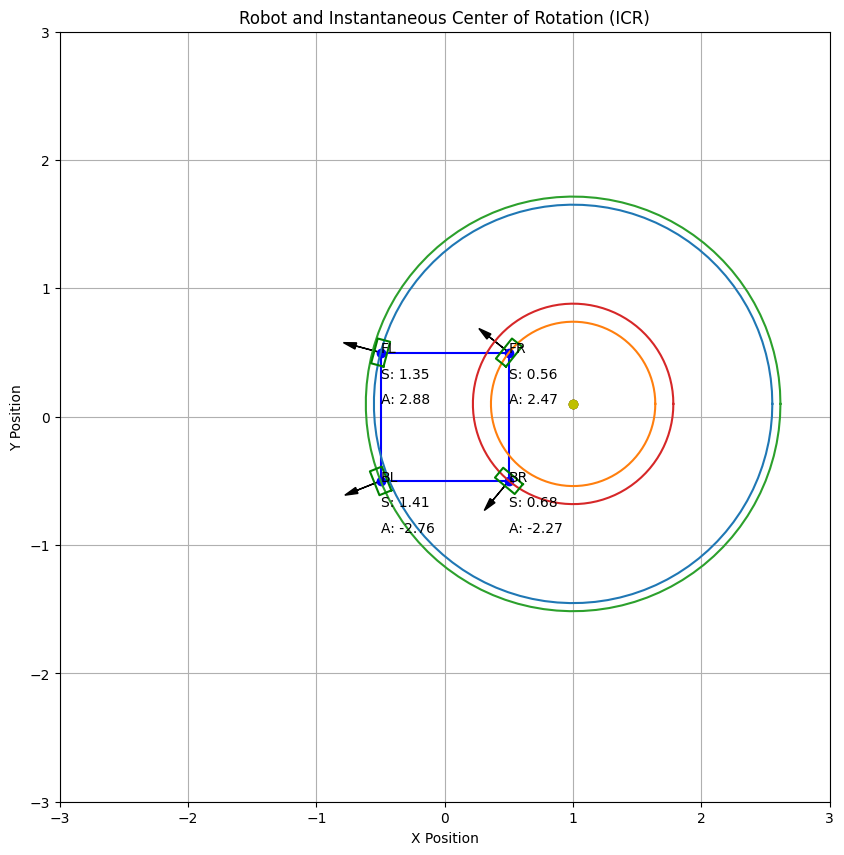

In [4]:
# Function to calculate wheel angles and speeds given average wheel speed
def calculate_wheel_controls(ICR_x, ICR_y,wheel_dict, avg_wheel_speed=1,speed_vector=None):
    if speed_vector is None:
        speed_vector = np.array([0,1])
    speed_vector=speed_vector*avg_wheel_speed
    # transform driving direction based on speed vector
    # rotation_matrix=
    # transformed_wheel_pos = 
    # Calculate steering angles and wheel speeds
    wheel_controls = {}
    angles = steering_angle(ICR_x, ICR_y, np.array([x for x, y in wheel_dict.values()]), np.array([y for x, y in wheel_dict.values()]))
    speeds =wheel_speed(ICR_x, ICR_y, np.array([x for x, y in wheel_dict.values()]), np.array([y for x, y in wheel_dict.values()]), avg_wheel_speed)
    print("speeds",speeds)
    for wheel, (x, y) in wheel_dict.items():
        angle = angles[list(wheel_dict.keys()).index(wheel)]
        speed = speeds[list(wheel_dict.keys()).index(wheel)]
        print("speed",speed)
        wheel_controls[wheel] = (angle, speed)
    
    return wheel_controls

# Function to plot the robot and ICR
def plot_robot_and_icr(ICR_x, ICR_y, avg_wheel_speed,delta_angle=0,delta_velocity=0):
    wheel_controls = calculate_wheel_controls(ICR_x, ICR_y, wheel_pos_dict,avg_wheel_speed)
    wheel_dict = {wheel: {"angle":angle, "speed":speed} for wheel, (angle, speed) in wheel_controls.items()}
    #add postions
    for wheel in wheel_pos_dict.keys():
        wheel_dict[wheel]["pos"] =wheel_pos_dict[wheel]
    print(wheel_dict)
    # Plot the robot from wheel_pos_dict
    fig, ax = plt.subplots()
    #points = [wheel_pos_dict["FL"], wheel_pos_dict["FR"], wheel_pos_dict["BR"], wheel_pos_dict["BL"], wheel_pos_dict["FL"]]
    points = [wheel_dict[wheel]["pos"] for wheel in ["FL","FR","BR","BL","FL"]]
    ax.plot([x for x, y in points], [y for x, y in points], 'b-')
    for wheel, (x, y) in wheel_pos_dict.items():
        ax.plot(x, y, 'bo')
        ax.annotate(wheel, (x, y))
    # Plot the ICR
    ax.plot(ICR_x, ICR_y, 'ro', label='ICR')

    #plot estimates ICRS
    ICR_x_est1 , ICR_y_est1 = calculate_icr_from_wheels(wheel_dict["FL"]["pos"][0],wheel_dict["FL"]["pos"][1],wheel_dict["FL"]["angle"],wheel_dict["FR"]["pos"][0],wheel_dict["FR"]["pos"][1],wheel_dict["FR"]["angle"])
    ICR_x_est2 , ICR_y_est2 = calculate_icr_from_wheels(wheel_dict["BL"]["pos"][0],wheel_dict["BL"]["pos"][1],wheel_dict["BL"]["angle"],wheel_dict["BR"]["pos"][0],wheel_dict["BR"]["pos"][1],wheel_dict["BR"]["angle"])
    
    ax.plot(ICR_x_est1, ICR_y_est1, 'go', label='ICR_est1')
    ax.plot(ICR_x_est2, ICR_y_est2, 'yo', label='ICR_est2')

    print(f"ICR : {ICR_x:.2f}, {ICR_y:.2f} ICR_est1 : {ICR_x_est1:.2f}, {ICR_y_est1:.2f} ICR_est2 : {ICR_x_est2:.2f}, {ICR_y_est2:.2f}")
    
    # Plot the circles for each wheel
    theta = np.linspace(0, 2 * np.pi, 100)
    for wheel, (angle, speed) in wheel_controls.items():
        x, y = wheel_pos_dict[wheel]
        radius = np.sqrt((ICR_x - x) ** 2 + (ICR_y - y) ** 2)
        x_circle = ICR_x + radius * np.cos(theta)
        y_circle = ICR_y + radius * np.sin(theta)
        ax.plot(x_circle, y_circle, label=f'{wheel} path')
        ax.annotate(f'S: {speed:.2f}', (x, y-0.2))
        
    # plot Estimated ICR from wheel angles

    # Plot the wheels and their directions
    for wheel, (angle, speed) in wheel_controls.items():
        x, y = wheel_pos_dict[wheel]
        dx = 0.2 * np.cos(angle)
        dy = 0.2 * np.sin(angle)
        ax.arrow(x, y, dx, dy, head_width=0.05, head_length=0.1, fc='k', ec='k')
        # wheel squares aligned with the direction of the wheel basd on angle
        wheel_width = 0.1
        wheel_length = 0.2
        wheel_points = [[-wheel_width/2,wheel_length/2],
                        [wheel_width/2,wheel_length/2],
                        [wheel_width/2,-wheel_length/2],
                        [-wheel_width/2,-wheel_length/2],
                        [-wheel_width/2,wheel_length/2]]
        # Rotate the wheel points based on angle
        rot_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                               [np.sin(angle), np.cos(angle)]])
        wheel_points = np.dot(wheel_points, rot_matrix.T)
        wheel_points = wheel_points + [x, y]
        ax.plot([x for x, y in wheel_points], [y for x, y in wheel_points], 'g-')

        
        ax.annotate(f'A: {angle:.2f}', (x , y -0.4))
    ax.set_aspect('equal')
    # ax.legend()
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title('Robot and Instantaneous Center of Rotation (ICR)')
    # set limits on plot
    robot_size = max(width, length)
    lim_scale = 3
    plt.xlim([-robot_size*lim_scale, robot_size*lim_scale])
    plt.ylim([-robot_size*lim_scale, robot_size*lim_scale])
    plt.grid(True)
    # size of plot
    plt.gcf().set_size_inches(10, 10)
    plt.show()
plot_robot_and_icr(1, 0.1, 1.0)

In [5]:

# Interactive sliders for ICR position and average wheel speed
interact(plot_robot_and_icr, 
         ICR_x=FloatSlider(min=-10, max=10, step=0.1, value=3.0, description='ICR_x'),
         ICR_y=FloatSlider(min=-10, max=10, step=0.1, value=4.0, description='ICR_y'),
         avg_wheel_speed=FloatSlider(min=0, max=10, step=0.1, value=2.0, description='Avg Wheel Speed'),
         delta_angle=FloatSlider(min=0, max=10, step=0.1, value=0.1, description='delta_angle'),
         delta_velocity=FloatSlider(min=0, max=10, step=0.1, value=0.1, description='delta_velocity')
)

interactive(children=(FloatSlider(value=3.0, description='ICR_x', max=10.0, min=-10.0), FloatSlider(value=4.0,…

<function __main__.plot_robot_and_icr(ICR_x, ICR_y, avg_wheel_speed, delta_angle=0, delta_velocity=0)>

### Steering map

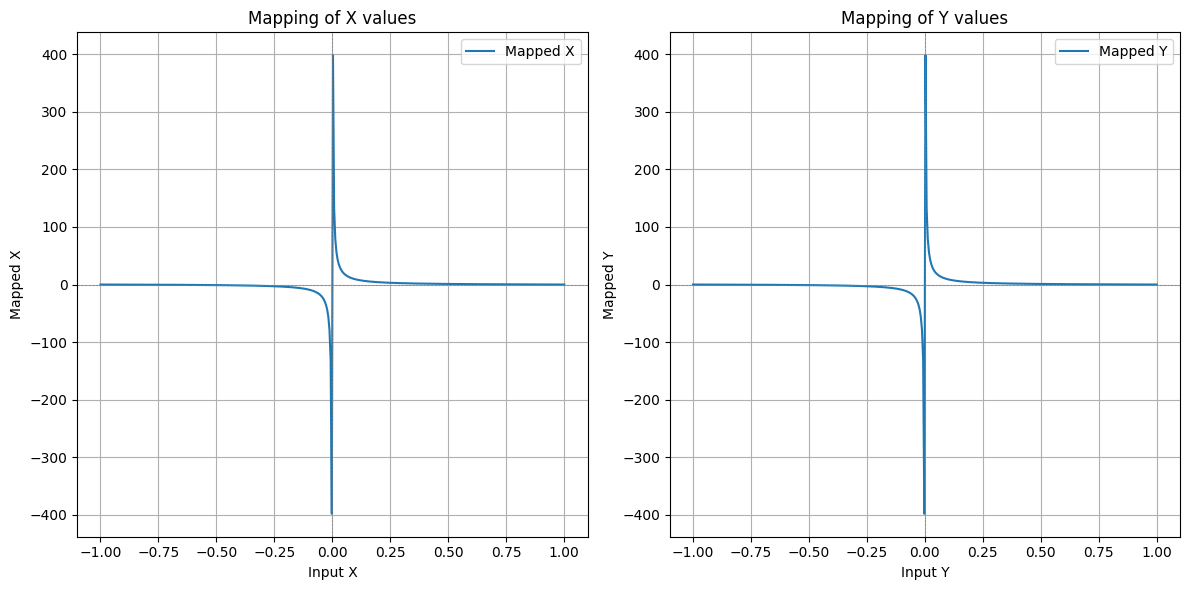

In [6]:
# Define the mapping function
def steering_map_function(x, y):
    x = np.clip(x, -1, 1)
    y = np.clip(y, -1, 1)
    x_map = np.sign(x) * (1 / abs(x) - 1) if x != 0 else np.inf
    y_map = np.sign(y) * (1 / abs(y) - 1) if y != 0 else np.inf
    return x_map, y_map

# Generate line plot data for the range -1 to 1
x_vals = np.linspace(-1, 1, 400)
y_vals = np.linspace(-1, 1, 400)

# Apply the mapping function
x_mapped = [steering_map_function(x, 0)[0] for x in x_vals]
y_mapped = [steering_map_function(0, y)[1] for y in y_vals]



# Plot the mapping for X
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_vals, x_mapped, label='Mapped X')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title('Mapping of X values')
plt.xlabel('Input X')
plt.ylabel('Mapped X')
plt.legend()
plt.grid(True)

# Plot the mapping for Y
plt.subplot(1, 2, 2)
plt.plot(y_vals, y_mapped, label='Mapped Y')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title('Mapping of Y values')
plt.xlabel('Input Y')
plt.ylabel('Mapped Y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [7]:
def steering_map(ICR_x_map=0,ICR_y_map=0,wheel_speed=1):
    # clip input to range [-1,1]
    eps=0.00001
    x=np.clip(ICR_x_map+eps,-1,1)
    y=np.clip(ICR_y_map+eps,-1,1)
    x_map = np.sign(x) * (1 / abs(x) - 1) if x != 0 else np.inf
    y_map = np.sign(y) * (1 / abs(y) - 1) if y != 0 else np.inf
    #y_map = ICR_y_map
    plot_robot_and_icr(x_map,y_map,wheel_speed)

In [8]:
# plot line
# Interactive sliders for ICR position and average wheel speed
interact(steering_map, 
         ICR_x_map=FloatSlider(min=-1, max=1, step=0.01, value=0.0, description='ICR_x'),
         ICR_y_map=FloatSlider(min=-1, max=1, step=0.01, value=1.0, description='ICR_y'),
         wheel_speed=FloatSlider(min=0, max=10, step=0.1, value=2.0, description='Avg Wheel Speed'));


interactive(children=(FloatSlider(value=0.0, description='ICR_x', max=1.0, min=-1.0, step=0.01), FloatSlider(v…